<a href="https://colab.research.google.com/github/Fakihnew23/Abdul_Aziz_Faqih_Nurdien_220201011/blob/main/UTS-Pengolahan-dan-Analisis-Citra-Digital_Abdul_Aziz_Faqih_Nurdien.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<b><h2>1. Import Module</h2></b>

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Flatten, Dense, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow # Import cv2_imshow

In [2]:
# memanggil drive google
from google.colab import drive
drive.mount('/content/drives/')

Mounted at /content/drives/


<b><h2>2. Load Dataset</h2></b>

In [4]:
imagePaths = '/content/drives/MyDrive/DatasetDaun1/DatasetDaun'
label_list = ['Daun Nangka', 'Nangka', 'Daun Sirih']
data = []
labels = []

<b><h2>3. Data Preprocessing</h2></b>

In [5]:
for label in label_list:
    image_dir = imagePaths+'/'+label+'/*.jpg'
    print(f"Looking for images in: {image_dir}") # Add this line to print the path
    for imagePath in glob.glob(image_dir):
        #print(imagePath)
        image = cv2.imread(imagePath)
        image = cv2.resize(image, (32, 32))
        data.append(image)
        labels.append(label)

Looking for images in: /content/drives/MyDrive/DatasetDaun1/DatasetDaun/Daun Nangka/*.jpg
Looking for images in: /content/drives/MyDrive/DatasetDaun1/DatasetDaun/Nangka/*.jpg
Looking for images in: /content/drives/MyDrive/DatasetDaun1/DatasetDaun/Daun Sirih/*.jpg


In [6]:
np.array(data).shape


(153, 32, 32, 3)

In [7]:
# ubah type data dari list menjadi array
# ubah nilai dari tiap pixel menjadi range [0..1]
data = np.array(data, dtype='float') / 255.0
labels = np.array(labels)


In [8]:
print(labels)


['Daun Nangka' 'Daun Nangka' 'Daun Nangka' 'Daun Nangka' 'Daun Nangka'
 'Daun Nangka' 'Daun Nangka' 'Daun Nangka' 'Daun Nangka' 'Daun Nangka'
 'Daun Nangka' 'Daun Nangka' 'Daun Nangka' 'Daun Nangka' 'Daun Nangka'
 'Daun Nangka' 'Daun Nangka' 'Daun Nangka' 'Daun Nangka' 'Daun Nangka'
 'Daun Nangka' 'Daun Nangka' 'Daun Nangka' 'Daun Nangka' 'Daun Nangka'
 'Daun Nangka' 'Daun Nangka' 'Daun Nangka' 'Daun Nangka' 'Daun Nangka'
 'Daun Nangka' 'Daun Nangka' 'Daun Nangka' 'Daun Nangka' 'Daun Nangka'
 'Daun Nangka' 'Daun Nangka' 'Daun Nangka' 'Daun Nangka' 'Daun Nangka'
 'Daun Nangka' 'Daun Nangka' 'Daun Nangka' 'Daun Nangka' 'Daun Nangka'
 'Daun Nangka' 'Daun Nangka' 'Daun Nangka' 'Daun Nangka' 'Daun Nangka'
 'Daun Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka'
 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka'
 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka'
 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka'
 '

In [9]:
# ubah nilai dari labels menjadi binary
lb = LabelEncoder()
labels = lb.fit_transform(labels)
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1]


<b><h2>4. Split Dataset</h2></b>

In [10]:
x_train, x_test, y_train, y_test = train_test_split(
    data, labels, test_size=0.2, random_state=42)

In [11]:
print('Ukuran data train =', x_train.shape)
print('Ukuran data test =', x_test.shape)


Ukuran data train = (122, 32, 32, 3)
Ukuran data test = (31, 32, 32, 3)


<b><h2>5. Build CNN Architecture</h2></b>

In [12]:
model = Sequential()
# Extracted Feature Layer
model.add(InputLayer(input_shape=[32, 32, 3]))
model.add(Conv2D(filters=32, kernel_size=2, strides=1,
          padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=50, kernel_size=2, strides=1,
          padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Dropout(0.25))
model.add(Flatten())
# Fully Connected Layer
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [13]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 50)     │         6,450 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 50)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 8, 8, 50)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,638,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,646,291 (6.28 MB)

 Trainable params: 1,646,291 (6.28 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# tentukan hyperparameter
lr = 0.001
max_epochs = 100
opt_funct = Adam(learning_rate=lr)


In [15]:
# compile arsitektur yang telah dibuat
model.compile(loss='binary_crossentropy',
              optimizer=opt_funct,
              metrics=['accuracy'])


<b><h2>6. Train Model</h2></b>

In [16]:
H = model.fit(x_train, y_train, validation_data=(x_test, y_test),
              epochs=max_epochs, batch_size=32)


Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 148ms/step - accuracy: 0.3145 - loss: 0.5226 - val_accuracy: 0.2581 - val_loss: -0.2484
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step - accuracy: 0.3712 - loss: 0.2280 - val_accuracy: 0.2581 - val_loss: -0.2349
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 126ms/step - accuracy: 0.3743 - loss: 0.7881 - val_accuracy: 0.2581 - val_loss: -0.1910
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step - accuracy: 0.3774 - loss: 0.3108 - val_accuracy: 0.2581 - val_loss: -0.1952
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - accuracy: 0.3524 - loss: -0.0878 - val_accuracy: 0.2581 - val_loss: -0.2403
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 125ms/step - accuracy: 0.3920 - loss: -0.1021 - val_accuracy: 0.2581 - val_loss: -0.2819
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.3420 - loss: -0.1291 - val_accuracy: 0.2581 - val_loss: -0.3266
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.3889 - loss: -0.1084 - val_accuracy: 0

4. Split Dataset

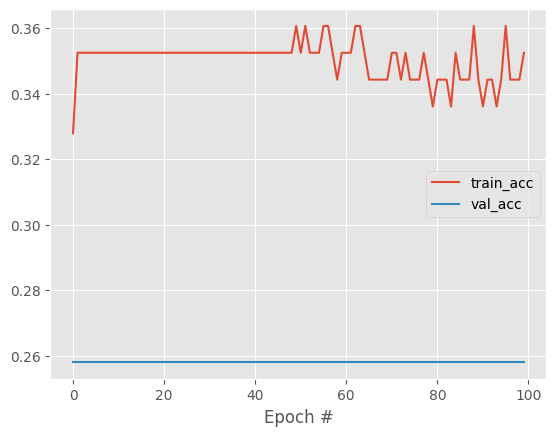

In [17]:
N = np.arange(0, max_epochs)
plt.style.use("ggplot")
plt.figure()
# plt.plot(N, H.history["loss"], label="train_loss")
# plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.xlabel("Epoch #")
plt.legend()
plt.show()


<b><h2>7. Evaluate the Model</h2></b>

In [18]:
# menghitung nilai akurasi model terhadap data test
predictions = model.predict(x_test, batch_size=32)
target = (predictions > 0.5).astype(int)
print(classification_report(y_test, target, target_names=label_list))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
              precision    recall  f1-score   support

 Daun Nangka       0.00      0.00      0.00        11
      Nangka       0.26      1.00      0.41         8
  Daun Sirih       0.00      0.00      0.00        12

    accuracy                           0.26        31
   macro avg       0.09      0.33      0.14        31
weighted avg       0.07      0.26      0.11        31



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<b><h2>8. Test Model</h2></b>

In [19]:
# uji model menggunakan image lain
queryPath = imagePaths+'/Daun Sirih/019.jpg' # Changed to Daun Sirih
query = cv2.imread(queryPath)
output = query.copy()
query = cv2.resize(query, (32, 32))
q = []
q.append(query)
q = np.array(q, dtype='float') / 255.0

q_pred = model.predict(q)

print(q_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
[[1.]]


<b><h2>9. Result</h2></b>

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Daun Nangka Test:


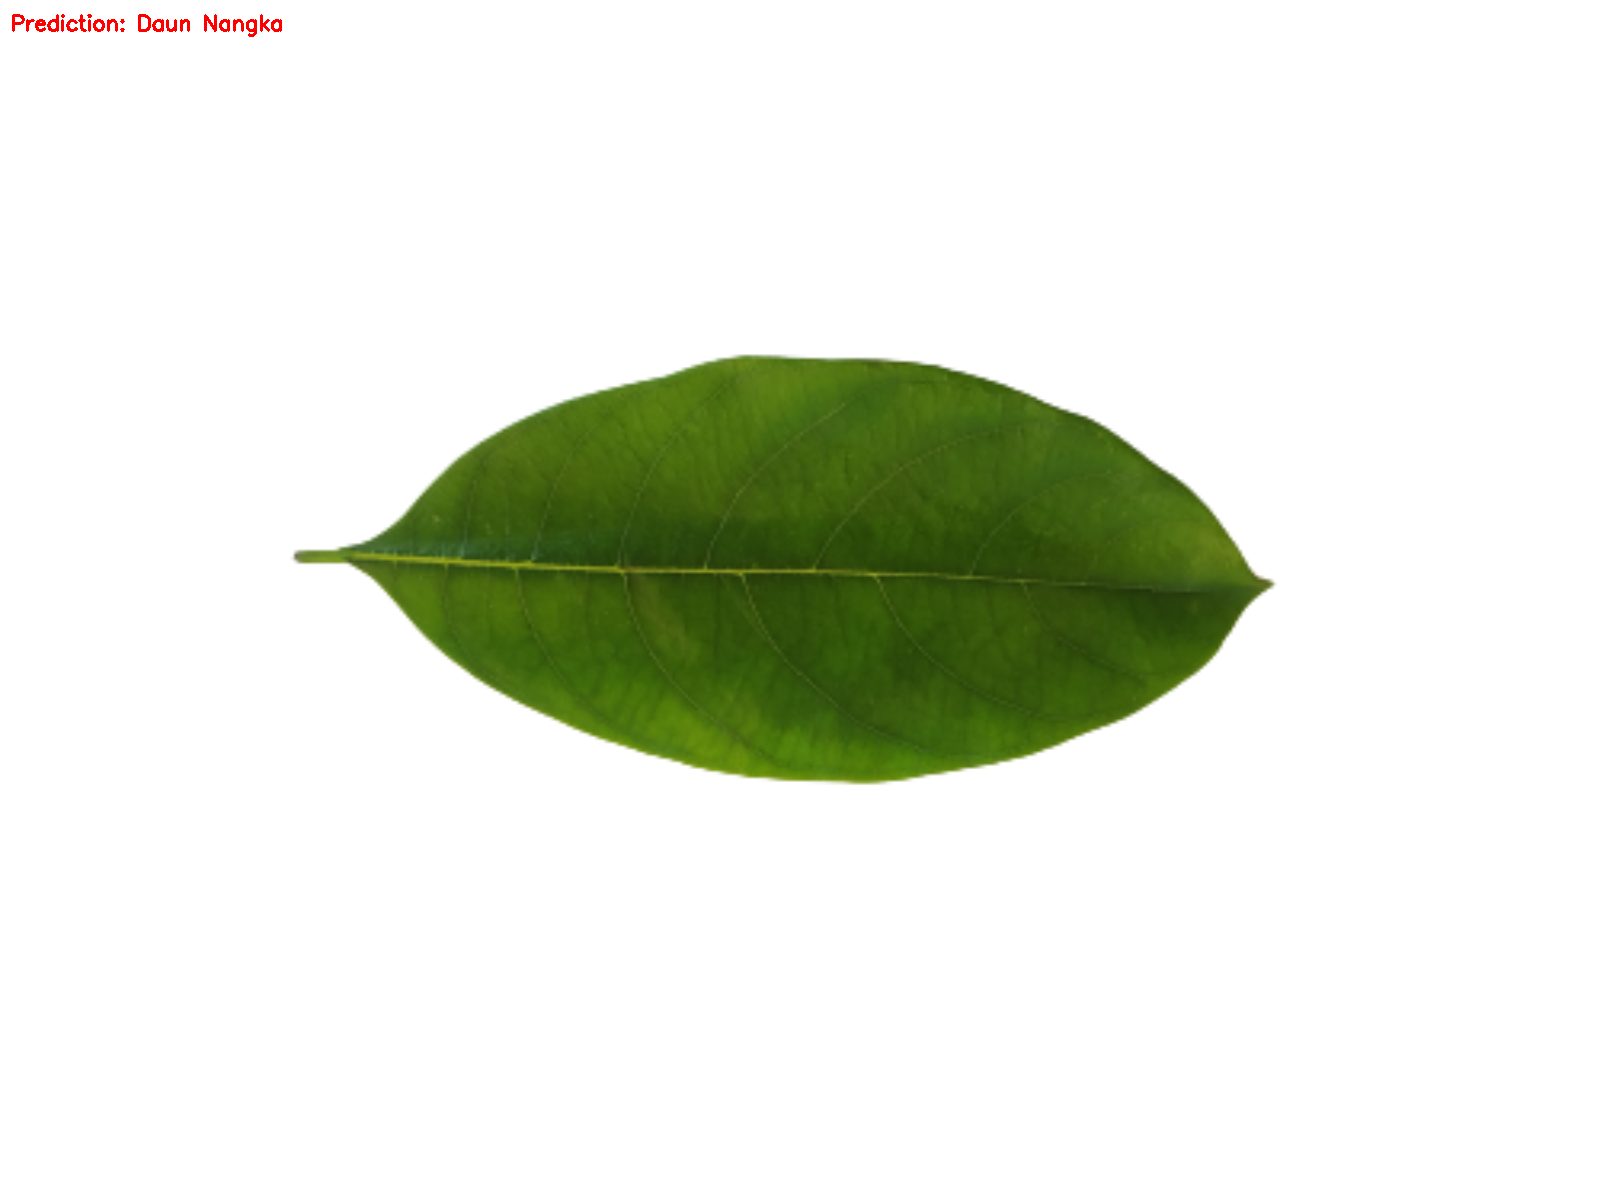


Daun Sirih Test:


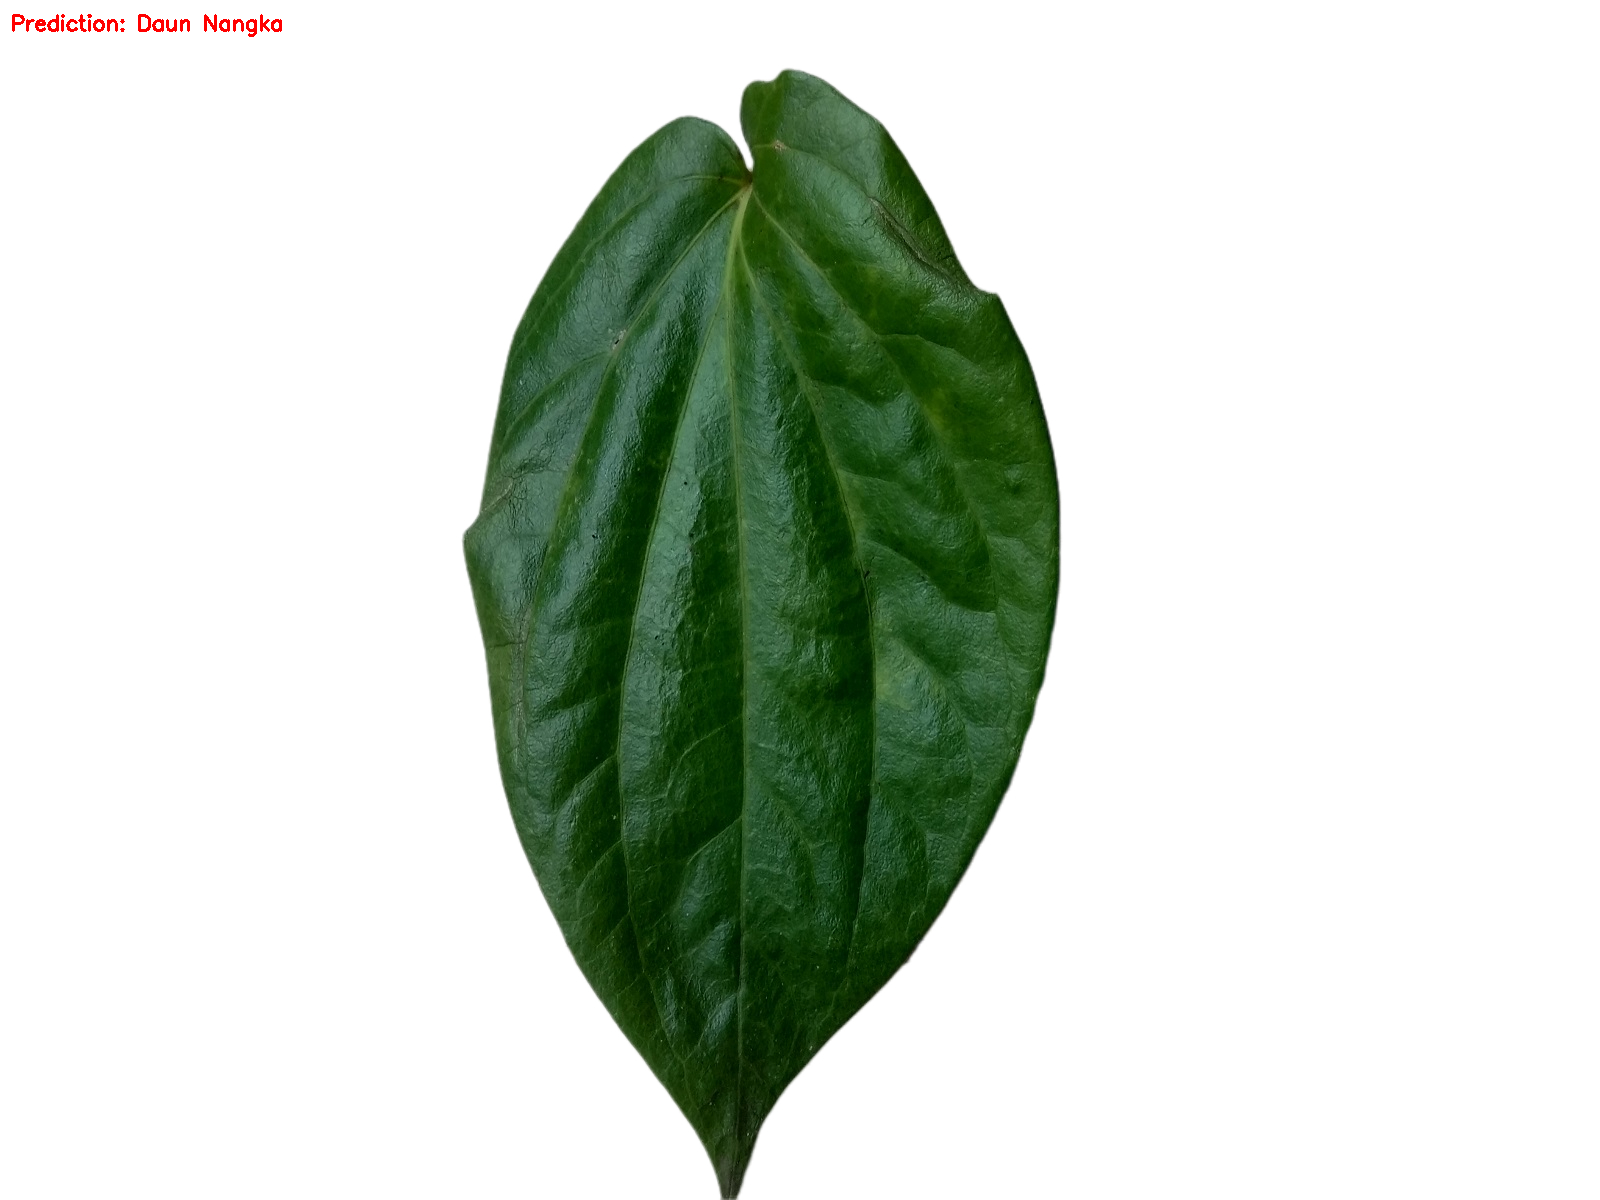

In [22]:
# Test with a "Daun Nangka" image
queryPath_nangka = imagePaths+'/Daun Nangka/019.jpg' # Changed to Daun Nangka
query_nangka = cv2.imread(queryPath_nangka)
output_nangka = query_nangka.copy()
query_nangka_resized = cv2.resize(query_nangka, (32, 32))
q_nangka = []
q_nangka.append(query_nangka_resized)
q_nangka = np.array(q_nangka, dtype='float') / 255.0

q_pred_nangka = model.predict(q_nangka)

# Assuming your model outputs probabilities for each class
# You need to get the index of the class with the highest probability
predicted_class_index_nangka = np.argmax(q_pred_nangka)
predicted_label_nangka = label_list[predicted_class_index_nangka]

text_nangka = "Prediction: {}".format(predicted_label_nangka)
cv2.putText(output_nangka, text_nangka, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

# Test with a "Daun Sirih" image
queryPath_sirih = imagePaths+'/Daun Sirih/019.jpg'
query_sirih = cv2.imread(queryPath_sirih)
output_sirih = query_sirih.copy()
query_sirih_resized = cv2.resize(query_sirih, (32, 32))
q_sirih = []
q_sirih.append(query_sirih_resized)
q_sirih = np.array(q_sirih, dtype='float') / 255.0

q_pred_sirih = model.predict(q_sirih)

predicted_class_index_sirih = np.argmax(q_pred_sirih)
predicted_label_sirih = label_list[predicted_class_index_sirih]

text_sirih = "Prediction: {}".format(predicted_label_sirih)
cv2.putText(output_sirih, text_sirih, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

# Display both images
print("Daun Nangka Test:")
cv2_imshow(output_nangka)

print("\nDaun Sirih Test:")
cv2_imshow(output_sirih)

In [23]:
# model.save('image_classification.h5')

10. Import Library

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Flatten, Dense, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import cv2, glob
import matplotlib.pyplot as plt
from google.colab import drive
from google.colab.patches import cv2_imshow


11. Mount Google Drive

In [30]:
drive.mount('/content/drive')

# Ganti path dataset sesuai folder kamu di Drive
imagePaths = '/content/drive/MyDrive/DatasetDaun1/DatasetDaun'
label_list = ['Nangka', 'Daun Nangka', 'Daun Sirih']



Mounted at /content/drive


12. Load Dataset

In [31]:
data, labels = [], []


In [32]:
for label in label_list:
    image_dir = f"{imagePaths}/{label}/*.jpg"
    print(f"📂 Mengambil gambar dari: {image_dir}")
    for imagePath in glob.glob(image_dir):
        image = cv2.imread(imagePath)
        image = cv2.resize(image, (32, 32))
        data.append(image)
        labels.append(label)



📂 Mengambil gambar dari: /content/drive/MyDrive/DatasetDaun1/DatasetDaun/Nangka/*.jpg
📂 Mengambil gambar dari: /content/drive/MyDrive/DatasetDaun1/DatasetDaun/Daun Nangka/*.jpg
📂 Mengambil gambar dari: /content/drive/MyDrive/DatasetDaun1/DatasetDaun/Daun Sirih/*.jpg


In [33]:
# Normalisasi data
data = np.array(data, dtype='float') / 255.0
labels = np.array(labels)



13. Encode Label & Split Data

In [34]:
lb = LabelEncoder()
labels = lb.fit_transform(labels)

x_train, x_test, y_train, y_test = train_test_split(
    data, labels, test_size=0.2, random_state=42
)


14. Model CNN (Baseline)


In [35]:
def build_cnn():
    model = Sequential()
    model.add(InputLayer(input_shape=[32, 32, 3]))
    model.add(Conv2D(32, (2,2), activation='relu', padding='same'))
    model.add(MaxPool2D(pool_size=2, padding='same'))
    model.add(Conv2D(50, (2,2), activation='relu', padding='same'))
    model.add(MaxPool2D(pool_size=2, padding='same'))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    return model


15. Training Model Awal (Tanpa Augmentasi)

In [36]:
model1 = build_cnn()
model1.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
print("\n🚀 Training model tanpa augmentasi...\n")
H1 = model1.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=40, batch_size=32, verbose=1)



🚀 Training model tanpa augmentasi...

Epoch 1/40


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 225ms/step - accuracy: 0.3551 - loss: 0.3927 - val_accuracy: 0.2581 - val_loss: 0.1654
Epoch 2/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.3149 - loss: -0.2605 - val_accuracy: 0.2581 - val_loss: 0.3191
Epoch 3/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - accuracy: 0.3441 - loss: 0.6682 - val_accuracy: 0.2581 - val_loss: 0.3181
Epoch 4/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step - accuracy: 0.3566 - loss: 0.2170 - val_accuracy: 0.2581 - val_loss: 0.3914
Epoch 5/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step - accuracy: 0.3702 - loss: -0.2122 - val_accuracy: 0.2581 - val_loss: 0.4961
Epoch 6/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - accuracy: 0.3462 - loss: 0.0496 - val_accuracy: 0.2581 - val_loss: 0.5525
Epoch 7/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.3660 - loss: -0.8546 - val_accuracy: 0.2581 - val_loss: 0.6957
Epoch 8/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.3316 - loss: 0.4827 - val_accuracy: 0.2581 - val_loss: 0.7275
Ep

16. Training Model dengan Algoritma Baru: Image Augmentation

In [37]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True,
    fill_mode='nearest'
)
datagen.fit(x_train)

model2 = build_cnn()
model2.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
print("\n Training model dengan augmentasi data...\n")
H2 = model2.fit(datagen.flow(x_train, y_train, batch_size=32),
                validation_data=(x_test, y_test),
                epochs=40,
                steps_per_epoch=len(x_train)//32,
                verbose=1)



 Training model dengan augmentasi data...

Epoch 1/40


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 485ms/step - accuracy: 0.3354 - loss: 0.5599 - val_accuracy: 0.2581 - val_loss: 0.2788
Epoch 2/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.2812 - loss: -0.2671 - val_accuracy: 0.2581 - val_loss: 0.2942
Epoch 3/40


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step - accuracy: 0.3392 - loss: 0.0518 - val_accuracy: 0.2581 - val_loss: 0.3176
Epoch 4/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.4375 - loss: 0.2324 - val_accuracy: 0.2581 - val_loss: 0.3235
Epoch 5/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step - accuracy: 0.3429 - loss: 0.0462 - val_accuracy: 0.2581 - val_loss: 0.3280
Epoch 6/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.3438 - loss: -0.2802 - val_accuracy: 0.2581 - val_loss: 0.3356
Epoch 7/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.3938 - loss: 0.2151 - val_accuracy: 0.2581 - val_loss: 0.3344
Epoch 8/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.2812 - loss: -0.3489 - val_accuracy: 0.2581 - val_loss: 0.3401
Epoch 9/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - accuracy: 0.4260 - loss: -0.3515 - val_accuracy: 0.2581 - val_loss: 0.3839
Epoch 10/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.2812 - loss: 0.0685 - val_accuracy: 0.2581 - val_loss: 0.3950
Epoch

17. Visualisasi Perbandingan Akurasi

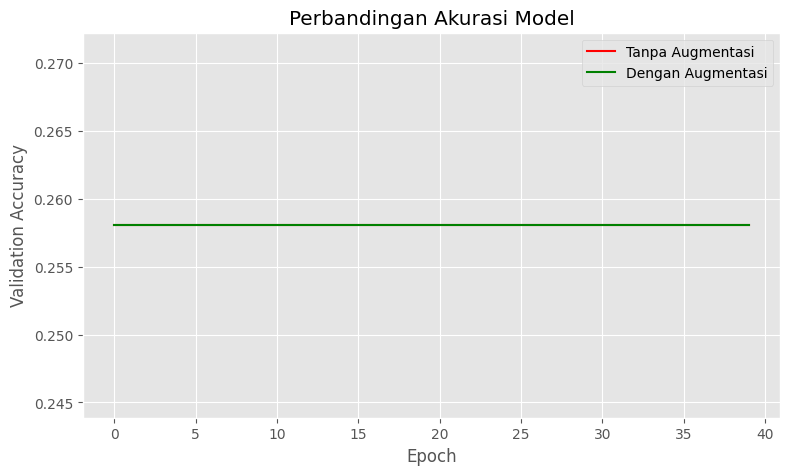

In [38]:
plt.figure(figsize=(9,5))
plt.plot(H1.history['val_accuracy'], label='Tanpa Augmentasi', color='red')
plt.plot(H2.history['val_accuracy'], label='Dengan Augmentasi', color='green')
plt.title('Perbandingan Akurasi Model')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()


18. Evaluasi Model

In [39]:
print("\n Hasil Model Tanpa Augmentasi:")
pred1 = (model1.predict(x_test) > 0.5).astype(int)
print(classification_report(y_test, pred1, target_names=label_list))

print("\n Hasil Model Dengan Augmentasi:")
pred2 = (model2.predict(x_test) > 0.5).astype(int)
print(classification_report(y_test, pred2, target_names=label_list))



 Hasil Model Tanpa Augmentasi:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
              precision    recall  f1-score   support

      Nangka       0.00      0.00      0.00        12
 Daun Nangka       0.26      1.00      0.41         8
  Daun Sirih       0.00      0.00      0.00        11

    accuracy                           0.26        31
   macro avg       0.09      0.33      0.14        31
weighted avg       0.07      0.26      0.11        31


 Hasil Model Dengan Augmentasi:


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
              precision    recall  f1-score   support

      Nangka       0.00      0.00      0.00        12
 Daun Nangka       0.26      1.00      0.41         8
  Daun Sirih       0.00      0.00      0.00        11

    accuracy                           0.26        31
   macro avg       0.09      0.33      0.14        31
weighted avg       0.07      0.26      0.11        31



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


19. Uji Model Terbaik dengan Gambar Baru


 Uji Gambar Daun Nangka:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


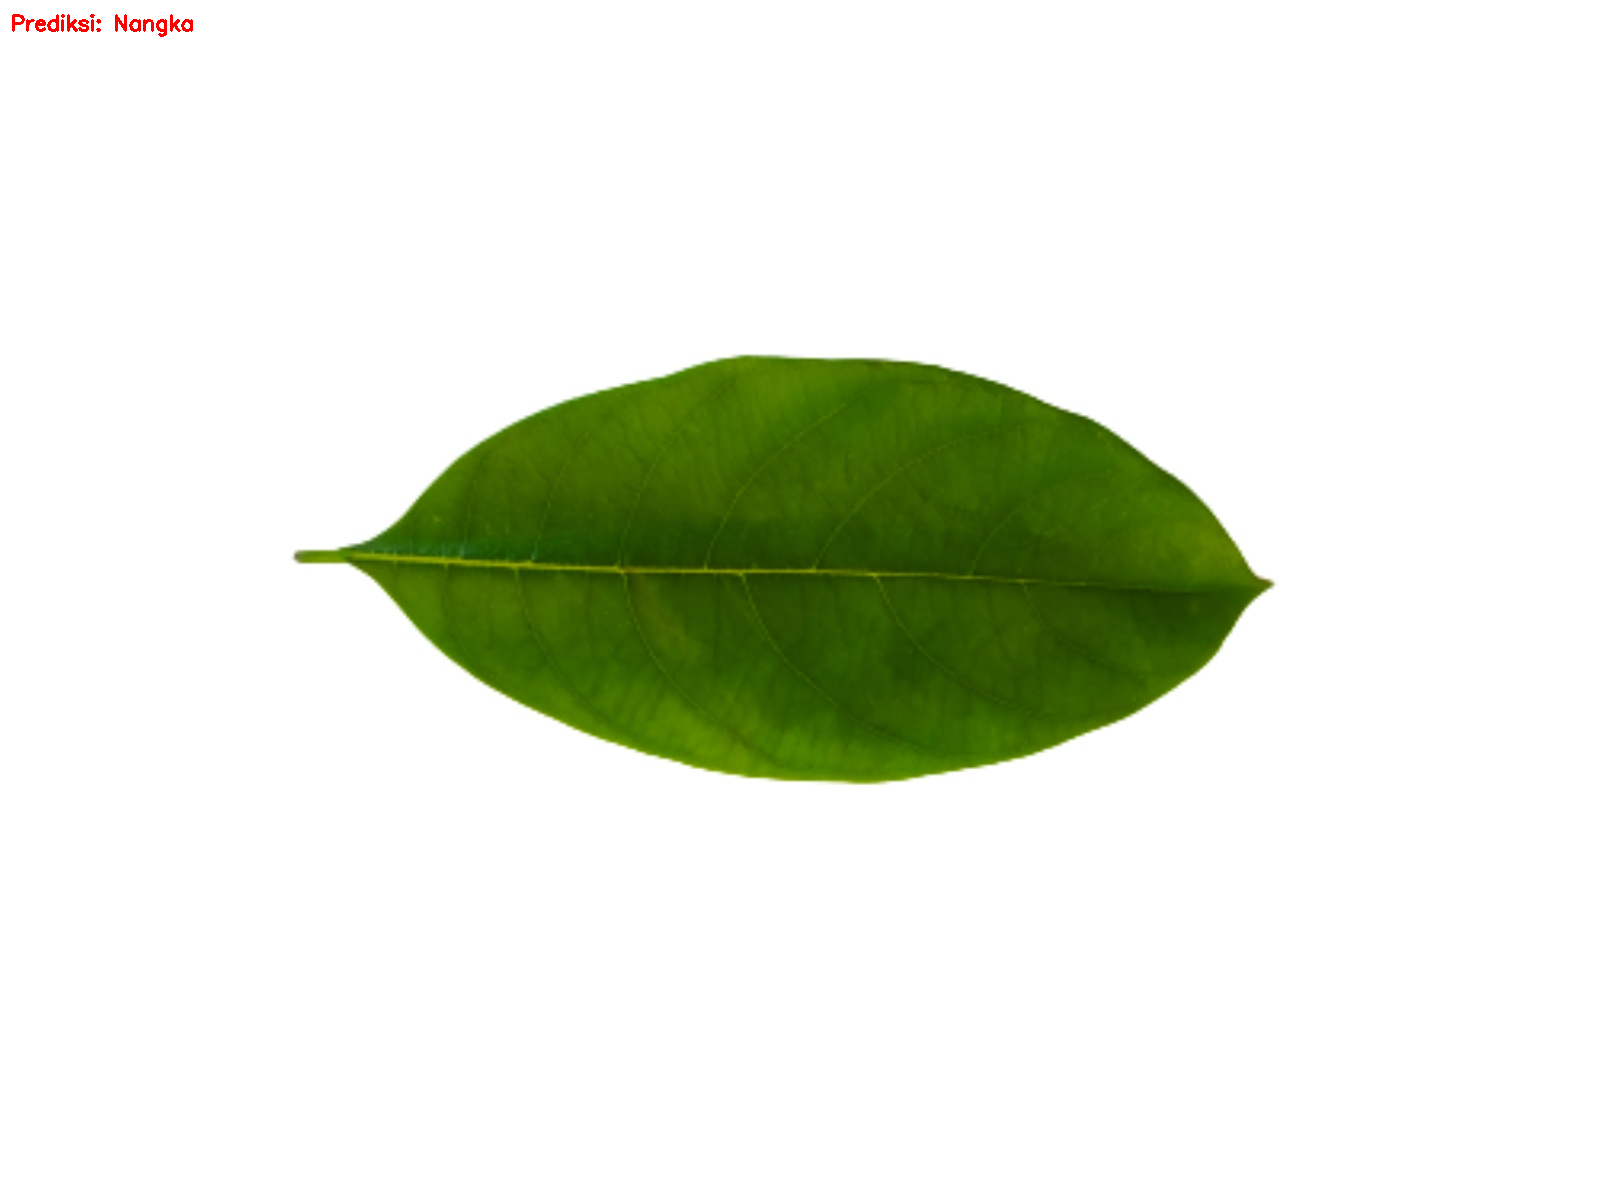

Prediksi: Nangka

 Uji Gambar Daun Sirih:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


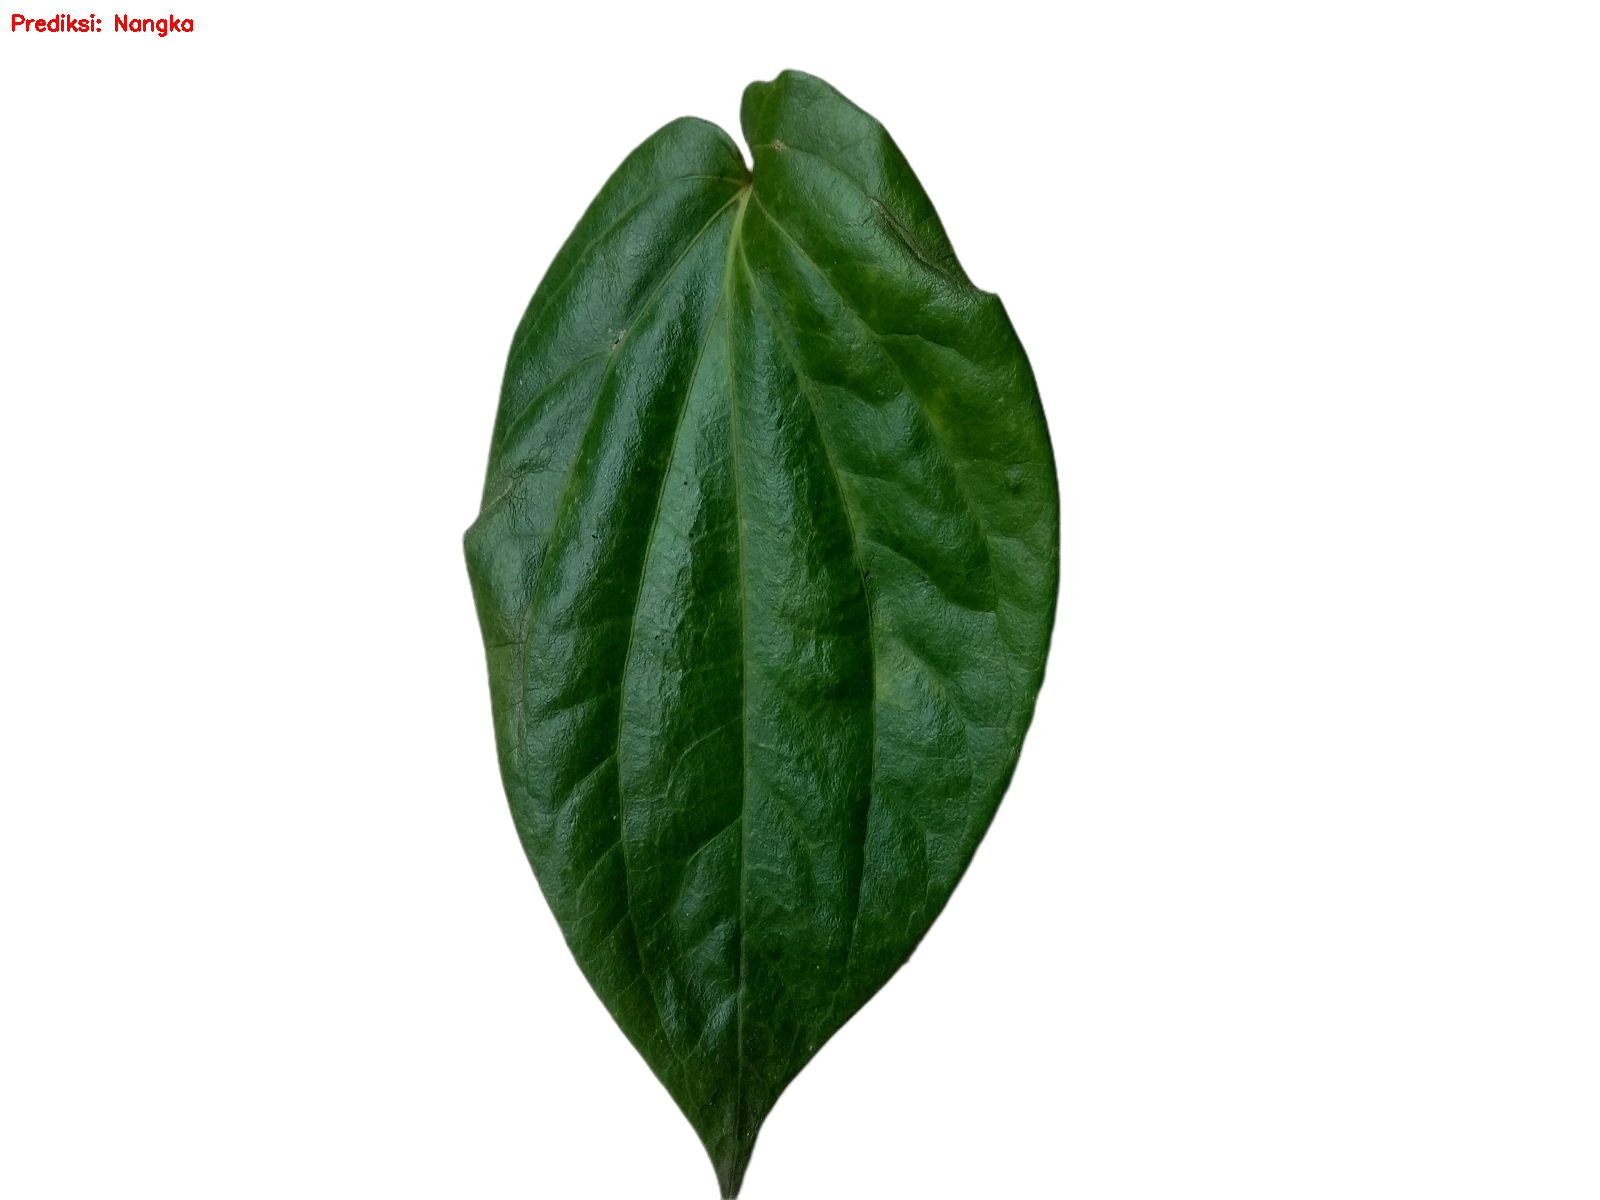

Prediksi: Nangka


In [41]:
def predict_image(model, img_path):
    img = cv2.imread(img_path)
    if img is None:
        print(f"Error: Could not load image from {img_path}")
        return
    output = img.copy()
    img = cv2.resize(img, (32, 32))
    img = np.array([img], dtype='float') / 255.0
    pred = model.predict(img)
    # Assuming your model outputs probabilities for each class and you need to get the predicted class index
    predicted_class_index = np.argmax(pred)
    label_pred = label_list[predicted_class_index] # Use the label_list to get the predicted label

    cv2.putText(output, f"Prediksi: {label_pred}", (10, 30),
                cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
    cv2_imshow(output)
    print("Prediksi:", label_pred)

print("\n Uji Gambar Daun Nangka:")
predict_image(model2, f"{imagePaths}/Nangka/019.jpg")

print("\n Uji Gambar Daun Sirih:")
predict_image(model2, f"{imagePaths}/Daun Sirih/019.jpg") # Corrected the space here